## **8.18** List all samples of size n = 2 that are possible (with replacement) from the population in Problem 8.17. Use the chart wizard of EXCEL to plot the sampling distribution of the mean to show that $μ_{\bar{x}} = μ$ and show that $σ^{2}_\bar{x} = \frac{σ^{2}}{2}$

In [55]:
import itertools
import numpy as np
import pandas as pd

# Population data and probabilities
population = [9, 12, 15]
probability = [1/3, 1/3, 1/3]

# All possible samples of size n=2 (with replacement)
samples = list(itertools.product(population, repeat=2))

# Mean of each sample
sample_means = [np.mean(sample) for sample in samples]

data = {
    'Samples of size n = 2': samples,
    'Mean': sample_means
}

df = pd.DataFrame(data)
df

,Samples of size n = 2,Mean
0,"(9, 9)",9.0
1,"(9, 12)",10.5
2,"(9, 15)",12.0
3,"(12, 9)",10.5
4,"(12, 12)",12.0
5,"(12, 15)",13.5
6,"(15, 9)",12.0
7,"(15, 12)",13.5
8,"(15, 15)",15.0


In [56]:
# Population mean and variance
population_mean = np.dot(population, probability)  # μ = Σx * p(x)
population_variance = np.dot(np.square(population), probability) - population_mean**2  # σ² = Σx²p(x) - μ²

# Mean and variance of the sampling distribution
sampling_mean = np.mean(sample_means)
sampling_variance = np.var(sample_means)

# Theoretical variance of the sampling distribution: σ²/2
theoretical_sampling_variance = population_variance / 2

print(f'''Population Mean: {population_mean}
Sampling Mean: {sampling_mean}
Population Variance: {population_variance}
Sampling Variance: {sampling_variance}
Theoretical Sampling Variance: {theoretical_sampling_variance}''')

Population Mean: 12.0
Sampling Mean: 12.0
Population Variance: 6.0
Sampling Variance: 3.0
Theoretical Sampling Variance: 3.0


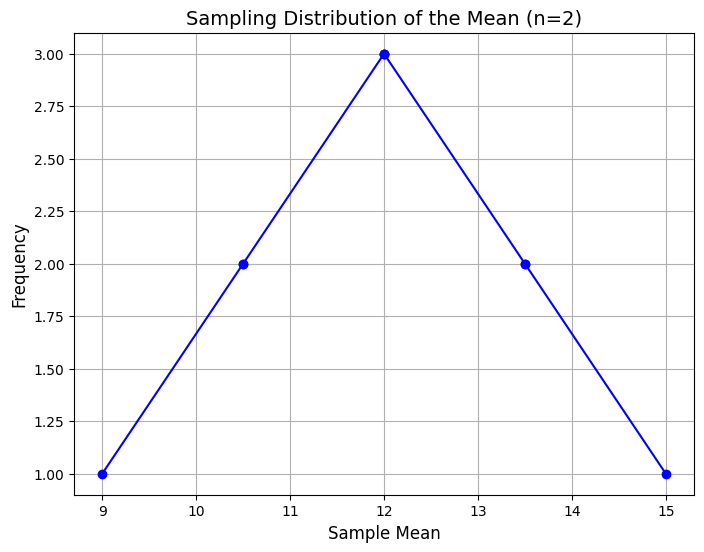

In [57]:
import matplotlib.pyplot as plt

# Create the plot for the sampling distribution of the mean as a line graph
plt.figure(figsize=(8, 6))

# Plot the sample means as a line graph
plt.plot(sorted(sample_means), [sample_means.count(x) for x in sorted(sample_means)], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title('Sampling Distribution of the Mean (n=2)', fontsize=14)
plt.xlabel('Sample Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()


## **8.21**  A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d) the standard deviation of the sampling distribution of means. Verify parts (c) and (d) directly from (a) and (b) by using suitable formulas.

In [58]:
# Population data
population = [3, 7, 11, 15]

# All possible samples of size n=2 (with replacement)
samples = list(itertools.product(population, repeat=2))
    
# Population Mean
population_mean = np.mean(population)

# Population Standard Deviation
population_std = np.std(samples)

# Mean of sampling distribution means
sample_means = [np.mean(sample) for sample in samples]
sample_mean = np.mean(sample_means)

# Standard deviation of sampling distribution means
sample_std = population_std/np.sqrt(2)

# Data Frame 1
data_1 = {
    'Samples (n=2)': samples,
    'Sample Means': sample_means
}
df_1 = pd.DataFrame(data_1)
df_1

,Samples (n=2),Sample Means
0,"(3, 3)",3.0
1,"(3, 7)",5.0
2,"(3, 11)",7.0
3,"(3, 15)",9.0
4,"(7, 3)",5.0
5,"(7, 7)",7.0
6,"(7, 11)",9.0
7,"(7, 15)",11.0
8,"(11, 3)",7.0
9,"(11, 7)",9.0


In [59]:
print(f'''(a) Population Mean: {population_mean},
(b) Population Standard Deviation: {round(population_std, 2)},
(c) Mean of sampling distribution means: {sample_mean},
(d) Standard deviation of sampling distribution means: {round(sample_std, 2)} ''')

(a) Population Mean: 9.0,
(b) Population Standard Deviation: 4.47,
(c) Mean of sampling distribution means: 9.0,
(d) Standard deviation of sampling distribution means: 3.16 


## **8.34**  Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and 57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and girls.

In [80]:
import scipy.stats as stats

# Parameters
n = 200  # total number of children
p = 0.5  # probability of being a boy

# (a) Probability of less than 40% boys (less than 80 boys)
k_a = 80  
mean = n * p
std_dev = (n * p * (1 - p)) ** 0.5

# Z-score for less than 80 boys
z_a = (k_a - mean) / std_dev
prob_a = stats.norm.cdf(z_a)
prob_a_percentage = prob_a * 100

# (b) Probability of between 43% and 57% girls (between 107 and 93 boys)
k_b1 = 107  # 43% girls -> 57% boys
k_b2 = 93   # 57% girls -> 43% boys

# Z-scores for 107 and 93 boys
z_b1 = (k_b1 - mean) / std_dev
z_b2 = (k_b2 - mean) / std_dev
prob_b = stats.norm.cdf(z_b1) - stats.norm.cdf(z_b2)
prob_b_percentage = prob_b * 100

# (c) Probability of more than 54% boys (more than 108 boys)
k_c = 108

# Z-score for more than 108 boys
z_c = (k_c - mean) / std_dev
prob_c = 1 - stats.norm.cdf(z_c)
prob_c_percentage = prob_c * 100

# Output results
print(f"Probability that less than 40% will be boys: {prob_a:.4f} or {prob_a_percentage:.2f}%")
print(f"Probability that between 43% and 57% will be girls: {prob_b:.4f} or {prob_b_percentage:.2f}%")
print(f"Probability that more than 54% will be boys: {prob_c:.4f} or {prob_c_percentage:.2f}%")

Probability that less than 40% will be boys: 0.0023 or 0.23%
Probability that between 43% and 57% will be girls: 0.6778 or 67.78%
Probability that more than 54% will be boys: 0.1289 or 12.89%


## **8.49**  The credit hour distribution at Metropolitan Technological College is as follows

In [81]:
data_MTC = {
    'x': [6, 9, 12, 15, 18],
    'p(x)': [0.1, 0.2, 0.4, 0.2, 0.1]
}

df_MTC = pd.DataFrame(data_MTC)
print(df_MTC.to_string(index=False))

 x  p(x)
 6   0.1
 9   0.2
12   0.4
15   0.2
18   0.1


## Find 𝜇 and $𝜎^2$. Give the 25 (with replacement) possible samples of size 2, their means, and their probabilities.

In [83]:
import itertools

# Given data
x_values = df_MTC['x']
p_values = df_MTC['p(x)']

# Calculate the population mean (mu)
mu = sum([x * p for x, p in zip(x_values, p_values)])

# Step 2: Calculate the population variance (sigma^2)
variance = sum([(x - mu) ** 2 * p for x, p in zip(x_values, p_values)])

# Generate all possible samples of size 2 (with replacement)
samples = list(itertools.product(x_values, repeat=2))

# Calculate the mean and probability for each sample
sample_means = [(x1 + x2) / 2 for x1, x2 in samples]
sample_probabilities = [
    p_values[df_MTC.index[df_MTC['x'] == x1][0]] * p_values[df_MTC.index[df_MTC['x'] == x2][0]]
    for x1, x2 in samples
]

# Combine results into a DataFrame
results_df = pd.DataFrame({
    'Sample': samples,
    'Mean': sample_means,
    'Probability': sample_probabilities
})

# Display the results
print(results_df)

      Sample  Mean  Probability
0     (6, 6)   6.0         0.01
1     (6, 9)   7.5         0.02
2    (6, 12)   9.0         0.04
3    (6, 15)  10.5         0.02
4    (6, 18)  12.0         0.01
5     (9, 6)   7.5         0.02
6     (9, 9)   9.0         0.04
7    (9, 12)  10.5         0.08
8    (9, 15)  12.0         0.04
9    (9, 18)  13.5         0.02
10   (12, 6)   9.0         0.04
11   (12, 9)  10.5         0.08
12  (12, 12)  12.0         0.16
13  (12, 15)  13.5         0.08
14  (12, 18)  15.0         0.04
15   (15, 6)  10.5         0.02
16   (15, 9)  12.0         0.04
17  (15, 12)  13.5         0.08
18  (15, 15)  15.0         0.04
19  (15, 18)  16.5         0.02
20   (18, 6)  12.0         0.01
21   (18, 9)  13.5         0.02
22  (18, 12)  15.0         0.04
23  (18, 15)  16.5         0.02
24  (18, 18)  18.0         0.01
